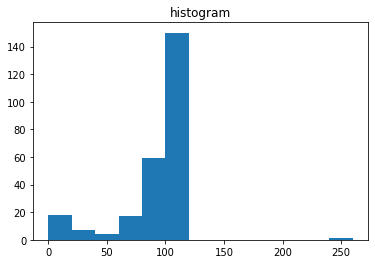

96


In [9]:
from PIL import Image
import math
import numpy as np
from matplotlib import pyplot as plt

image = Image.open("D:/studies/word_image_generator-master/Chest_HoanMy_98.jpg")
img = np.array(Image.open("D:/studies/word_image_generator-master/Chest_HoanMy_98.jpg").resize((256,256)))
image = image.resize((256,256))
image = image.convert("L")

x = np.array([])
for y in range(255):
    holder = []
    holder1 = np.array([])
    for x in range(255):
        #print(image.getpixel((x,y)))
        #holder.append(image.getpixel((x,y)))
        holder1 = np.append(holder1,image.getpixel((x,y)))
        #print(holder1)
        
        
    #print(holder)
    x = np.append(x,holder1)

def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weigth = 1.0/pixel_number
    his, bins = np.histogram(gray, np.arange(0,257))
    
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range 
        pcb = np.sum(his[:t]) # P1
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weigth 
        Wf = pcf * mean_weigth

        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb) #phi1 (class mean)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf) 
        value = Wb * Wf * (mub - muf) ** 2 #ob

        if value > final_value: #o > Smax
            final_thresh = t
            final_value = value
    final_img = gray.copy()
    print(final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img

np.histogram(y,bins=[0,20,40,60,80,100,120,140,160,180,200,220,240,260])
hist, bins = np.histogram(y,bins=[0,20,40,60,80,100,120,140,160,180,200,220,240,260])
plt.hist(x,bins=[0,20,40,60,80,100,120,140,160,180,200,220,240,260])
plt.title("histogram")
plt.show()
threshold = otsu(img)
new_image = Image.new('L',(256,256),"white")

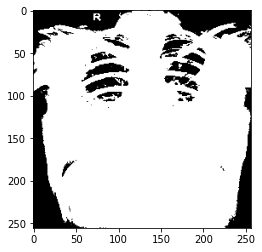

In [5]:
plt.imshow(threshold, cmap='Greys_r')
plt.draw()
plt.show()

# The threshold is chosen so that the object is separate from the background, the lung is also visible from the body object because in the original image, the lung is not clearly show and can be considered as a background